# Read image

In [18]:
from skimage import io
from PIL import Image
import numpy as np

In [19]:
#image_path = '../../GoogleEarthEngine/Images_landsat/Image 2013_10.png'
image_path = '../../GoogleEarthEngine/patches_6bands/2015/5/Image 2015_5_sharpend_27.tif'

In [20]:
# With skimage
#im = io.imread(image_path)
# With PIL
im = io.imread(image_path)

# image has 6 bands, 2 to 6
im.shape

(256, 256, 6)

# See the image

<p align="center">
  <img src="https://www.researchgate.net/profile/Bakenaz-Zeidan/publication/327212711/figure/tbl3/AS:668486690934791@1536391055484/Landsat-8-Bands-Designations.png" width="500" height="400">
</p>


# RGB image

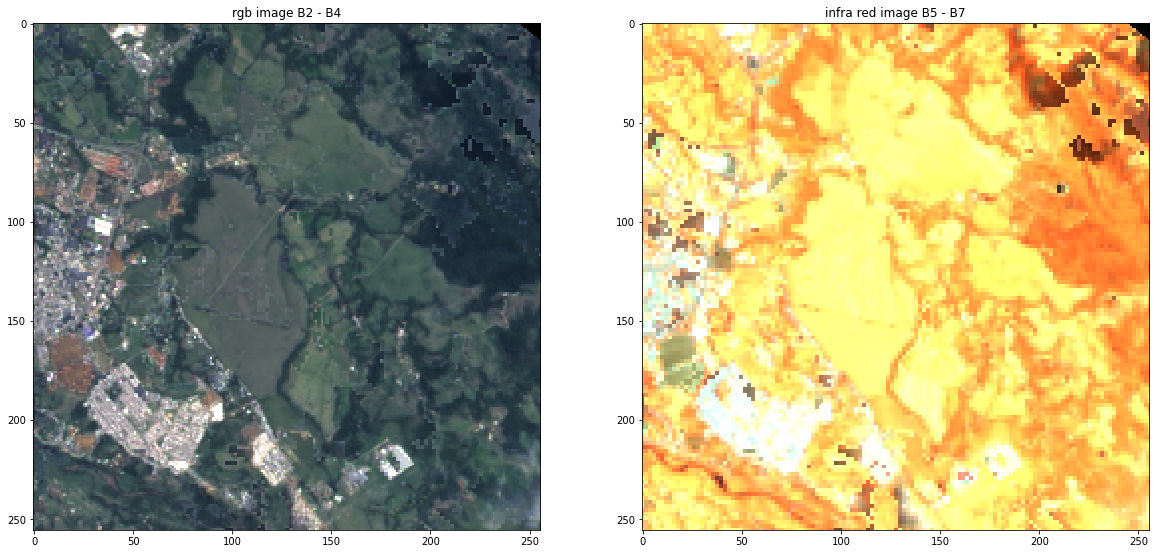

In [21]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1,2, figsize=(20,15))

axs[0].set_title('rgb image B2 - B4')
axs[0].imshow(im[:,:,:3], interpolation='nearest')

axs[1].set_title('infra red image B5 - B7')
axs[1].imshow(im[:,:,3:6], interpolation='nearest')

plt.show()

# Data Preparation

In [22]:
flatten_image = im.reshape((im.shape[0] * im.shape[1], im.shape[2]))
flatten_image.shape

(65536, 6)

# Train Model

In [23]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=5, covariance_type="tied")
gmm = gmm.fit(flatten_image)


# Generate Cluster

In [24]:
import numpy as np

segmented_image = gmm.predict(flatten_image)
segmented_image = segmented_image.reshape(im.shape[0], im.shape[1])

# See Cluster

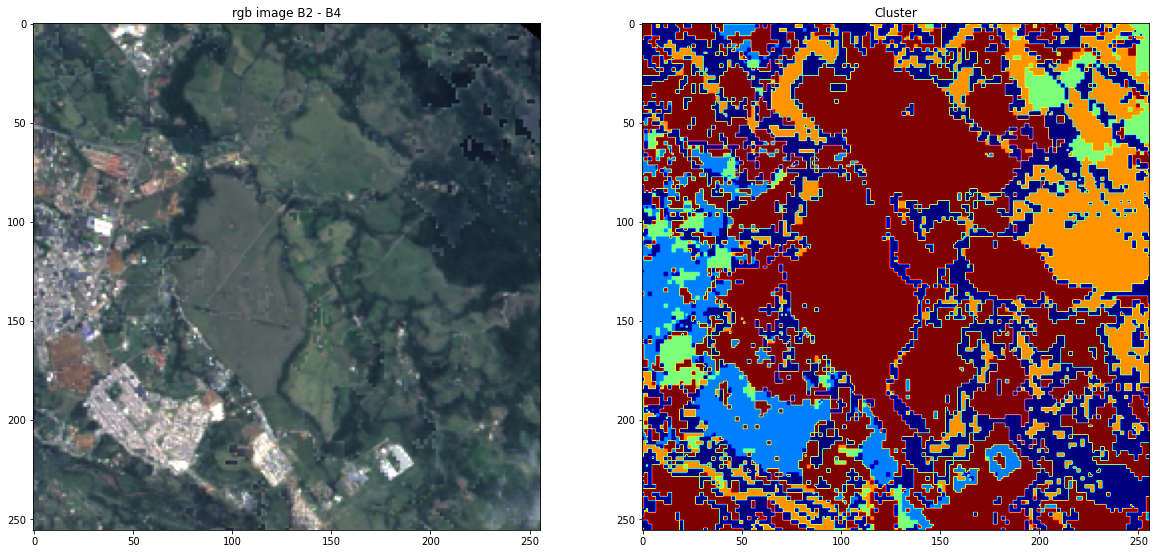

In [25]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1,2, figsize=(20,15))

axs[0].set_title('rgb image B2 - B4')
axs[0].imshow(im[:,:,:3])

axs[1].set_title('Cluster')
colors = {0:'red', 1:'green', 2:'blue'}
axs[1].imshow(segmented_image, cmap='jet')
#axs[1].imshow(segmented_image, cmap=colors)

plt.show()